In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from glob import glob
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization,Input,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from keras import Sequential
from keras.preprocessing.image import load_img,img_to_array

In [2]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
img_width=180
img_height=180

In [4]:
train_path='Contacts/Dengue Area Data/train'
#test_path='Contacts/Dengue Area Data/Test'
#val_path='Contacts/Dengue Area Data/Validation'

In [5]:
data_train=tf.keras.utils.image_dataset_from_directory(
    train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 114 files belonging to 2 classes.


In [6]:
#data_test=tf.keras.utils.image_dataset_from_directory(
#    test_path,
#    shuffle=False,
#    image_size=(img_width,img_height),
#    batch_size=32,
#    validation_split=False
#)

In [7]:
#data_val=tf.keras.utils.image_dataset_from_directory(
#    val_path,
#    shuffle=False,
#    image_size=(img_width,img_height),
#    batch_size=32,
#    validation_split=False
#)

In [8]:
data_cat=data_train.class_names
data_cat

['Dengue Area', 'Non Dengue Area']

In [17]:
class_names = data_train.class_names
class_indices = {name: index for index, name in enumerate(class_names)} # Create the class_indices dictionary using the class_names 
print(class_indices)

{'Dengue Area': 0, 'Non Dengue Area': 1}


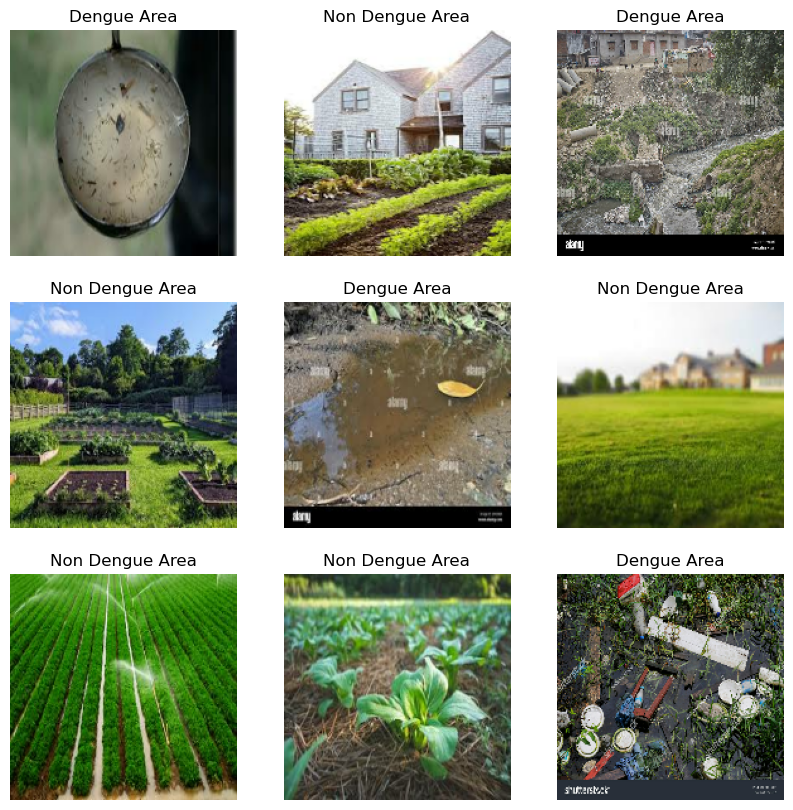

In [19]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range (9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'Contacts/Dengue Area Data/train',  # Path to your training data directory
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='binary'  # Binary classification
)

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=20)


Found 114 images belonging to 2 classes.
Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 823ms/step - accuracy: 0.5279 - loss: 1.8211
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 738ms/step - accuracy: 0.6417 - loss: 0.6781
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 560ms/step - accuracy: 0.8832 - loss: 0.5310
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 752ms/step - accuracy: 0.8757 - loss: 0.3152
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 822ms/step - accuracy: 0.9197 - loss: 0.1800
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 761ms/step - accuracy: 0.9748 - loss: 0.1130
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 814ms/step - accuracy: 0.9286 - loss: 0.1733
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 771ms/step - accuracy: 0.9870 - loss: 0.0585
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 883ms/step - accuracy: 0.9676 - loss: 0.0665
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 770ms/step - accuracy: 0.9658 - loss: 0.0940
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 881ms/step - accuracy: 0.9695 - loss: 0.1034
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━

In [23]:
model.save('Dengue_Area_Detection_model.keras')


In [25]:
from tensorflow.keras.models import load_model

model = load_model('Dengue_Area_Detection_model.keras')


In [26]:
import cv2
import numpy as np

# Open a connection to the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame for prediction
    image = cv2.resize(frame, (150, 150))
    image = image.astype('float32') / 255
    image = np.expand_dims(image, axis=0)

    # Make predictions on the frame
    pred_prob = model.predict(image)
    pred = (pred_prob > 0.5).astype('int32')

    # Annotate the frame with the prediction
    label = 'Non Dengue Area' if pred[0][0] == 1 else 'Dengue Area'
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the frame
    cv2.imshow('Real-Time Dengue Area Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━

In [83]:
from IPython.display import FileLink

# Create a link to download the saved model
FileLink('Dengue_Area_Detection_model.keras')


C:\Users\royal\Dengue_Area_Detection_model.keras